In [1]:
using IJulia
using Distributions
using Plots
using Base

# Coupon Collector's Problem

In [2]:
function simulate(n)
    i = 0
    set = Set()
    while length(set) < n
        i += 1
        x = rand(1:n)
        union!(set,x)
    end
    i
end

simulate (generic function with 1 method)

## Approximation via Exponential-Distribution
$$ T_{\textrm{finish}} \sim \max(\textrm{Geom}(1/n)) \sim \max(\textrm{Exp}(1/n)) $$

$$ F(x) = (1-e^{-x/n})^n $$
$$ f(x) = (1-e^{-x/n})^{n-1} e^{-x/n} $$

In [3]:
struct CC
    n::Int64
end

function pdf(dist::CC, x)
    n = dist.n
    (1 .- exp.(-x ./ n)) .^ (n-1) .* exp.(-x ./ n)
end

function cdf(dist::CC, x)
    n = dist.n
    (1 .- exp.(-x ./ n)) .^ n
end

function Base.length(dist::CC)
    1
end

In [4]:
n = 100
dist = CC(n)
samples = [simulate(n) for _ in 1:100000];

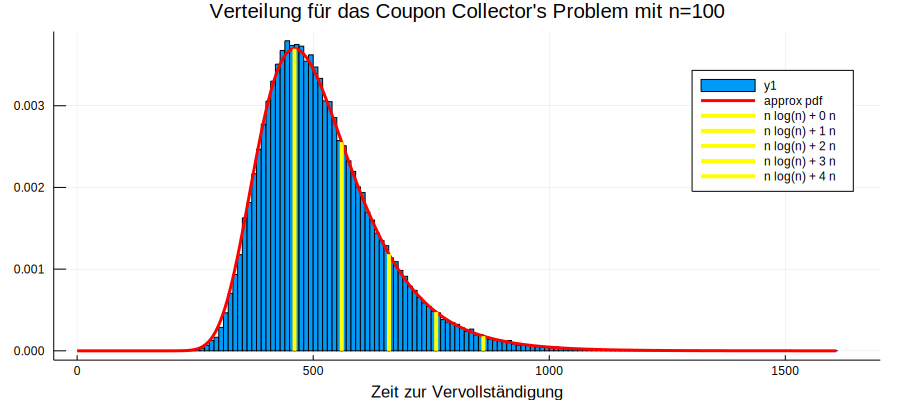

In [5]:
h = histogram(samples, normalize=:pdf, size=(900,400),
    title="Verteilung für das Coupon Collector's Problem mit n=$n",
    xlab="Zeit zur Vervollständigung")
ts = 0:maximum(samples)
plot!(h, ts, pdf(dist, ts), width=3, color="red", label="approx pdf")
for i in 0:4
    cut = n*log(n) + i*n
    plot!(h, [cut,cut], [0, pdf(dist, cut)], width=4,
        color="yellow",
        label="n log(n) + $i n")
end

display(h)

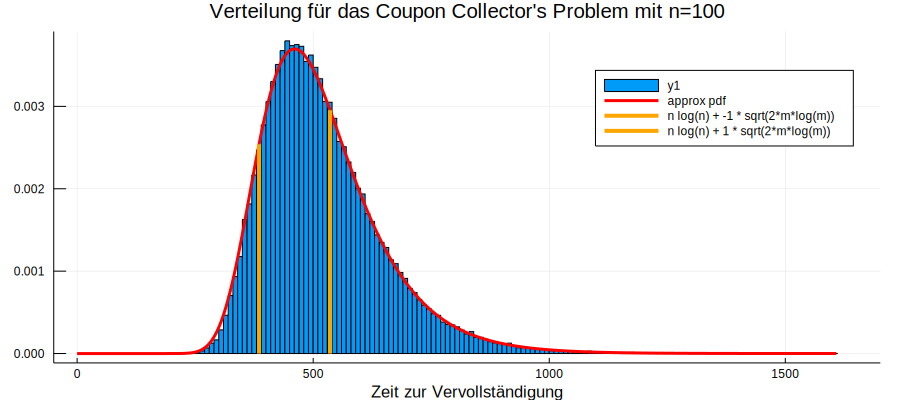

In [6]:
h = histogram(samples, normalize=:pdf, size=(900,400),
    title="Verteilung für das Coupon Collector's Problem mit n=$n",
    xlab="Zeit zur Vervollständigung")
ts = 0:maximum(samples)
plot!(h, ts, pdf(dist, ts), width=3, color="red", label="approx pdf")

for s in [-1,1]
    cut = n*log(n) + s*sqrt(2*n*log(n)*log(n*log(n)))
    plot!(h, [cut,cut],[0, pdf(dist, cut)], width=4,
        color="orange",
        label="n log(n) + $s * sqrt(2*m*log(m))")
end

display(h)

## Bounds for the Finishing Time


$$ \mathbb{P}(X > n\log(n) + cn) = 1 - (1-e^{-\log(n)-c})^n = 1 - (1-\frac{e^{-c}}{n})^n \approx 1 - e^{-e^{-c}} $$


## On the coupon collector's problem

https://math.stackexchange.com/questions/379525/probability-distribution-in-the-coupon-collectors-problem